<a href="https://colab.research.google.com/github/iotaminus1/Playstore-and-User-Review-Data-Analysis/blob/main/Team_NoteBook_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

##**Introduction**##
In this project we have to analyze the key factors responsible for app engagement and success of the apps.
For this, we have been given 2 datasets for analysing.
- Playstore Data
- User Review Data

To come to a conclusion we use Python and its libraries, Pandas & Numpy for Data Manipulation, and Matplotlib & seaborn for visualisation of different datas.


##**Importing libraries and data from drive**

In [1]:
# importing python libraries for analysis
import numpy as np                     # for data manipulation
import pandas as pd                    # for mathematical operation and linear algebra
import matplotlib.pyplot as plt        # for data visualisation
import seaborn as sns                  # making statistical graphics
import plotly.express as px
import missingno as msno                # for data visualisation
%matplotlib inline

In [2]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# importing data from drive and reading csv file
PS_rew_data = pd.read_csv('/content/drive/MyDrive/ALMABETTER/Modules/Topics/Capstone EDA/Play Store Data.csv')
user_reviews_data = pd.read_csv('/content/drive/MyDrive/ALMABETTER/Modules/Topics/Capstone EDA/User Reviews.csv')


## Analysing Data
**Data analysis is defined as a process of cleaning, transforming, and modeling data to discover useful information for business decision-making. The purpose of Data Analysis is to extract useful information from data and taking the decision based upon the data analysis.**


Let's analyse each column separately 

##**I. PLAY STORE DATA**

In [4]:
# Check the number of rows and columns in the playstore data
PS_rew_data.shape

(10841, 13)

In [5]:
# loading first 5 datas of playstore data 
PS_rew_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# loading last 5 datas of playstore data 
PS_rew_data.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [7]:
#information in playstore dataset
PS_rew_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
# statistical description of playstore data
PS_rew_data.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Checking null values in playstore data
PS_rew_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

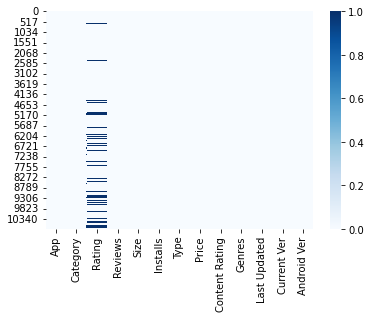

In [10]:
#visualising null values 
sns.heatmap(PS_rew_data.isnull(),cmap="Blues")

Inference :

From information, 
- There many missing datas and we have to replace all the null values.
- All the data type is object which can be changed. 
- Maximum Null values present in Rating Column so we have to check the dataset for that.
- For Current Ver and Android Ver we will the mode value to fill the Null data.

From Description, 

- Maximum rating given in data is 19, which is impossible since the range of rating is from 0 to 5.

From null operation,

- The number of null values is highest in rating which is represented visually. 

##Data Cleaning

**Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled. If data is incorrect, outcomes and algorithms are unreliable, even though they may look correct. There is no one absolute way to prescribe the exact steps in the data cleaning process because the processes will vary from dataset to dataset. But it is crucial to establish a template for your data cleaning process so you know you are doing it the right way every time.**

From Statistical desciption we see that the maximum rating is 19, which is impossible as maximum is 5. So it is understood that there is an outlier, which can be deleted.



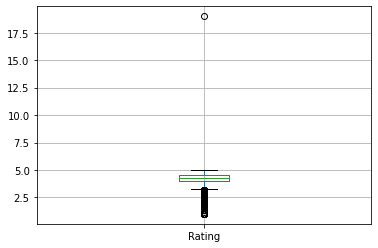

In [11]:
#box plot representation of outlier
PS_rew_data.boxplot()

In [12]:
#list of data having rating greater than 5
PS_rew_data[PS_rew_data.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
#deleting the outlier
PS_rew_data.drop([10472], inplace=True)
#checking if the outlier is actually deleted
PS_rew_data[10470:10473]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


From the above list of data it is understood that the outlier is deleted. And hence the row with index 10472 is deleted.


##Next step is to fill the null values.

In [14]:
# Filling the null values in Ratings column with the mean value
PS_rew_data['Rating'] = PS_rew_data['Rating'].fillna(PS_rew_data['Rating'].mean())

In [15]:
# Filling all the null values in the playstore data
PS_rew_data['Type'].fillna('Free',inplace=True)
PS_rew_data['Content Rating'].fillna('Everyone',inplace=True)
PS_rew_data['Android Ver'].fillna('4.1 and up',inplace=True)
PS_rew_data['Current Ver'].fillna('Varies with device',inplace=True)

In [16]:
# checking number of null values 
PS_rew_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

**All the null values are being replaced for data analysis.**

In [17]:
#data info
PS_rew_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


**From the info it is clear that columns are objects which can be converted into integer or float or date-time. So we have to replace all the unwanted symbols.**

In [18]:
# Replacing symbols such as 'M', 'k', '+', ',', '$', 'Varies with device' 
PS_rew_data['Size'] = PS_rew_data['Size'].str.replace('M','000')
PS_rew_data['Size'] = PS_rew_data['Size'].str.replace('Varies with device','0')
PS_rew_data['Size'] = PS_rew_data['Size'].str.replace('k','')
PS_rew_data['Installs'] = PS_rew_data['Installs'].str.replace('+','')
PS_rew_data['Installs'] = PS_rew_data['Installs'].str.replace(',','')
PS_rew_data['Price'] = PS_rew_data['Price'].str.replace('$','')
# Checking the first 5 data
PS_rew_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7000,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8000,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [19]:
# Converting Size, Price and Reviews to float, and Installs to integer
PS_rew_data['Size'] = PS_rew_data['Size'].astype(float)
PS_rew_data['Installs'] = PS_rew_data['Installs'].astype(int)
PS_rew_data['Price'] = PS_rew_data['Price'].astype(float)
PS_rew_data['Reviews'] = PS_rew_data['Reviews'].astype(float)

In [20]:
# checking the information in playstore dataset
PS_rew_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.2+ MB


In [21]:
# Check whether there are any duplicate apps in the given playstore data 
boolean = PS_rew_data['App'].duplicated().any()
boolean

True

In [22]:
# List and count of number of duplicate apps
PS_rew_data['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

In [23]:
PS_rew_data[PS_rew_data['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388.0,67000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346.0,67000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791.0,67000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882.0,67000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910.0,67000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910.0,67000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855.0,67000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890.0,67000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407.0,67000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


**As we can see from the above dataframe, ROBOLOX app is having identical rows with the reviews and category. It may have happened that for the same app, the data has been scrapped in different points of time. so we have to keep the row of an app with maximum numner of reviews, assuming it to be latest one.**

In [24]:
# deleting the duplicating apps
PS_rew_data.drop_duplicates(subset='App',inplace=True)
PS_rew_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644.0,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38.0,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4.0,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.191757,3.0,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114.0,0.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [25]:
PS_rew_data['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
Tic Tac CK                                        1
INFAMY RO                                         1
CK Call NEW                                       1
Ck Coif                                           1
                                                 ..
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
Mind Games Pro                                    1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9659, dtype: int64

In [27]:
PS_rew_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   float64
 4   Size            9659 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   object 
 12  Android Ver     9659 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.0+ MB


**We have deleted the row with outlier and the null values are replaced.** 

##**II. USER REVIEWS DATA**

In [29]:
user_reviews_data.shape

(64295, 5)

In [30]:
user_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [31]:
user_reviews_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [32]:
user_reviews_data.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [33]:
user_reviews_data.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [42]:
user_reiews_data = user_reviews_data[user_reviews_data['Translated_Review'].notna()]

In [39]:
user_reviews_data.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Angry Birds Classic,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


**Data clearing is complete!**

**Now we can start data analysis**

##**Exploratory Data Analysis**

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Here we analyze each column separately.

**1. Analysing 'Category'**

In [44]:
# list of categories of apps
PS_rew_data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [45]:
# count of each category 
PS_rew_data.Category.value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

#**Question-1:(a) Finding Top apps in Playstore as per Category**

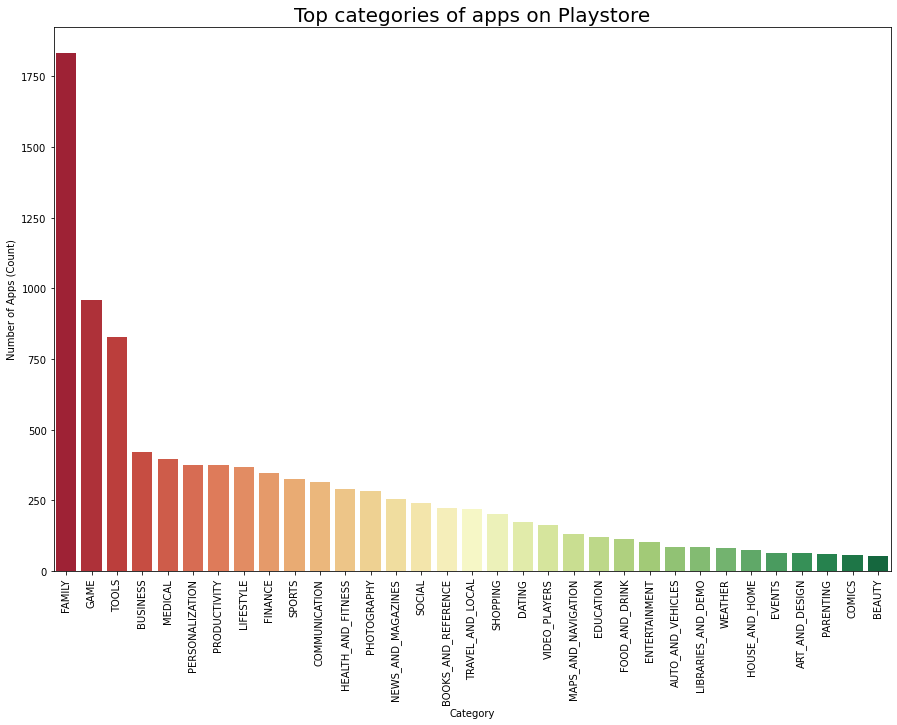

In [46]:
# Graphical representation of Category
x= PS_rew_data['Category'].value_counts().index
y= PS_rew_data['Category'].value_counts()

xsis = []
ysis = []

for i in range(len(x)):
    xsis.append(x[i])    
    ysis.append(y[i])

plt.figure(figsize = (15, 10))
plt.xlabel("Category")
plt.ylabel("Number of Apps (Count)")
plt.xticks(rotation=90)
ax = sns.barplot(x = xsis, y = ysis, palette= "RdYlGn")
ax.set_title("Top categories of apps on Playstore", fontsize = 20)
plt.show()

##**Inference-:** 

**- In the Google Play Store, most categories of apps are from Family, Game, Tools and least are from Parenting, Comics & Beauty.**

**- So this Data will give us brief the daily requirements of users.**

##**Question-1: Finding Top-20 Apps according to Genres**

In [48]:
top_genres = PS_rew_data.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})
genres_installs = PS_rew_data.groupby(['Genres'])[['Installs']].sum()

In [49]:
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_20_genres_installs = top_genres_installs.head(20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


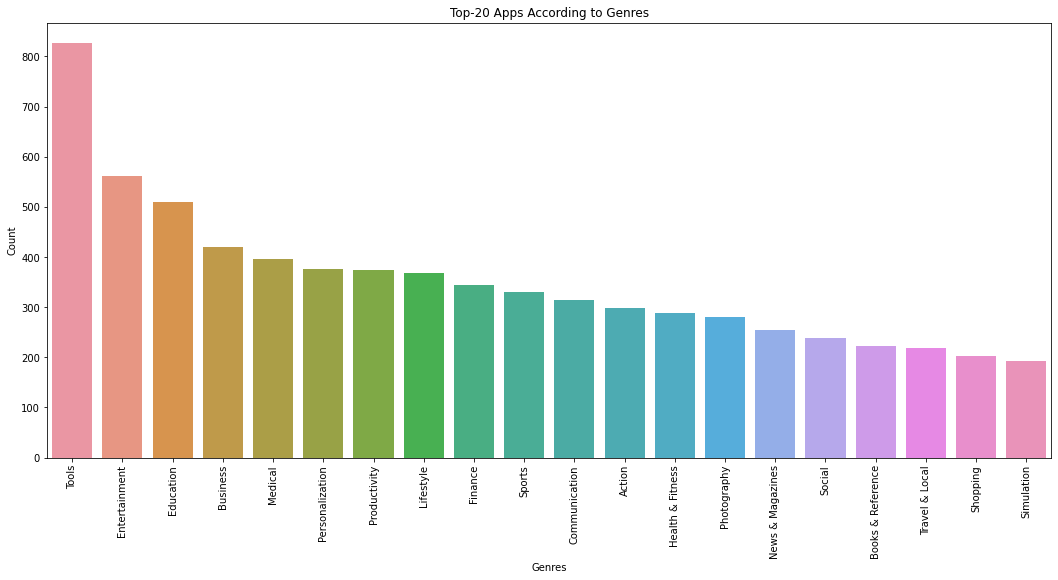

In [51]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Number of Application")
plt.title("Top-20 Apps According to Genres")
sns.barplot(top_20_genres_installs.Genres,  top_20_genres_installs.Count)
plt.show()

##**Question-1: (c)Finding Top apps in playstore as per Genres**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


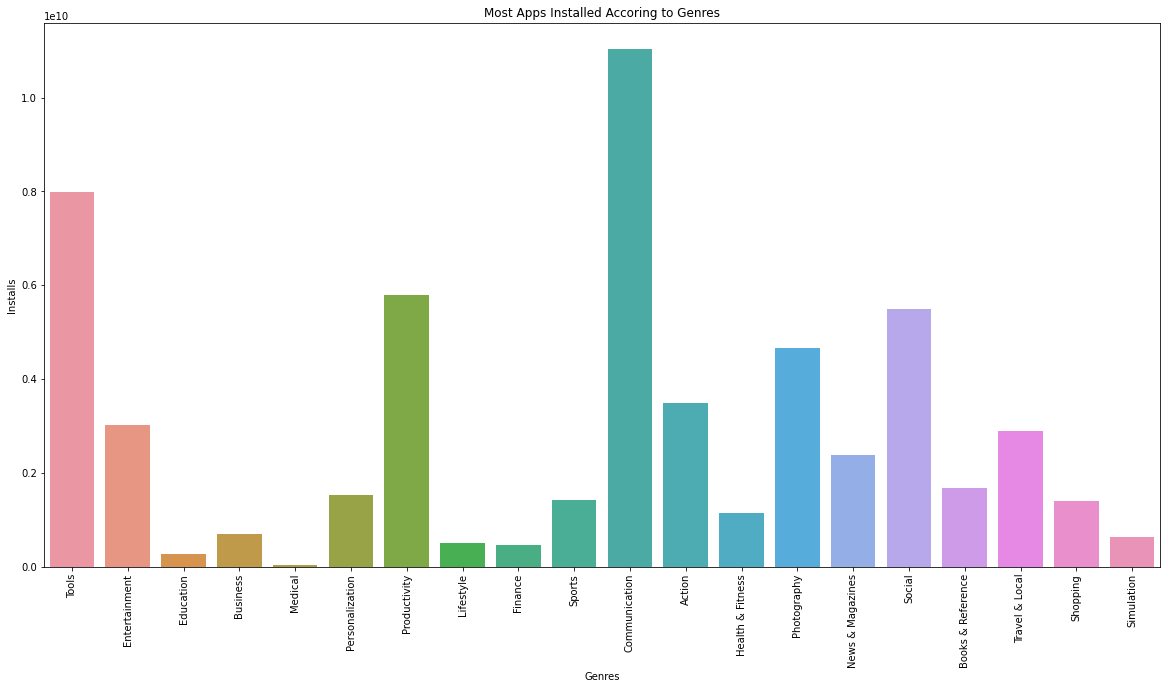

In [53]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Most Apps Installed Accoring to Genres")
sns.barplot(top_20_genres_installs.Genres,  top_20_genres_installs.Installs)
plt.show()

In [52]:
top_20_genres_installs.Installs

0      7991771915
1      3014714684
2       258410148
3       697164865
4        38193177
5      1532494782
6      5793091369
7       493823539
8       455348734
9      1412474498
10    11038276251
11     3483039190
12     1144022512
13     4649147655
14     2369217760
15     5487867902
16     1665969576
17     2894787146
18     1400348785
19      629597820
Name: Installs, dtype: int64

**Inference-:**
**- In the Google Play Store, Top Apps according to Genres are from Tools, Entertainment & Education**



**2. Analysing 'Rating'**


   Rates of apps are in the range 0 - 5.

In [54]:
#list of ratings
PS_rew_data.Rating.unique()

array([4.1       , 3.9       , 4.7       , 4.5       , 4.3       ,
       4.4       , 3.8       , 4.2       , 4.6       , 3.2       ,
       4.        , 4.19175742, 4.8       , 4.9       , 3.6       ,
       3.7       , 3.3       , 3.4       , 3.5       , 3.1       ,
       5.        , 2.6       , 3.        , 1.9       , 2.5       ,
       2.8       , 2.7       , 1.        , 2.9       , 2.3       ,
       2.2       , 1.7       , 2.        , 1.8       , 2.4       ,
       1.6       , 2.1       , 1.4       , 1.5       , 1.2       ])

In [55]:
#number of different ratings
PS_rew_data.Rating.value_counts()

4.191757    1463
4.300000     897
4.400000     895
4.500000     848
4.200000     810
4.600000     683
4.100000     621
4.000000     513
4.700000     442
3.900000     359
3.800000     286
5.000000     271
3.700000     224
4.800000     221
3.600000     167
3.500000     156
3.400000     126
3.300000     100
4.900000      85
3.000000      81
3.100000      69
3.200000      63
2.900000      45
2.800000      40
2.600000      24
2.700000      23
2.500000      20
2.300000      20
2.400000      19
1.000000      16
2.200000      14
2.000000      12
1.900000      11
1.700000       8
1.800000       8
2.100000       8
1.600000       4
1.400000       3
1.500000       3
1.200000       1
Name: Rating, dtype: int64

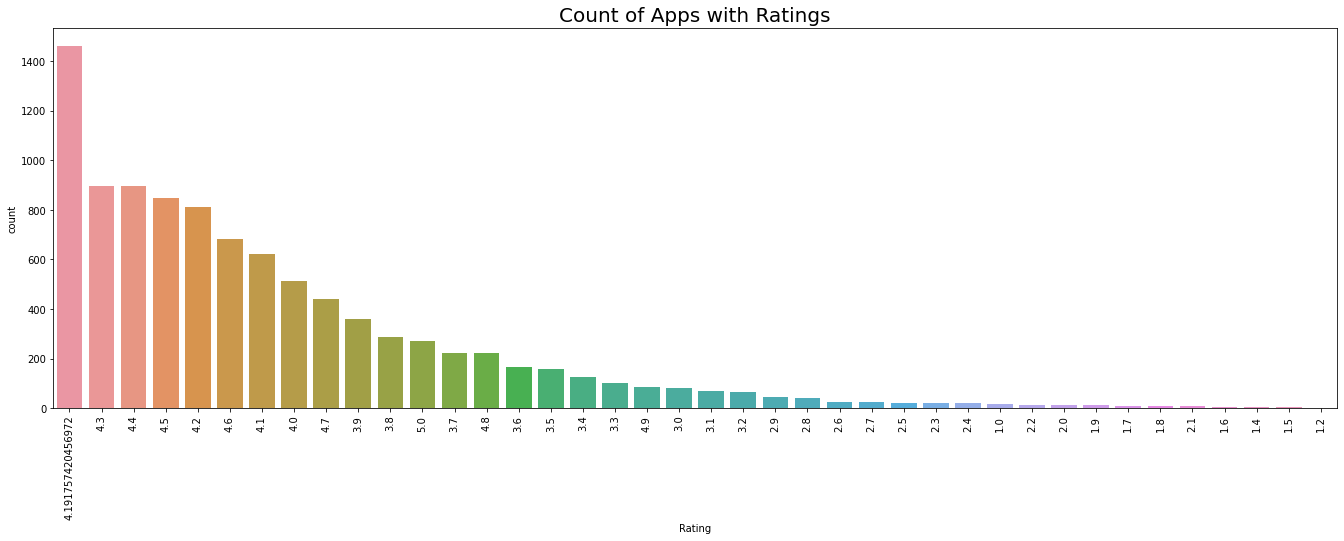

In [57]:
# plotting count of apps with rating (countplot)
plt.figure(figsize = (23, 7))
sns.countplot(x='Rating',data=PS_rew_data,order=PS_rew_data.Rating.value_counts().index)
plt.xticks(rotation=90)
plt.title('Count of Apps with Ratings', fontsize = 20)
plt.show()

##**Question-2: Let's now dive into the Rating section and try to establish some meaningful insights.**

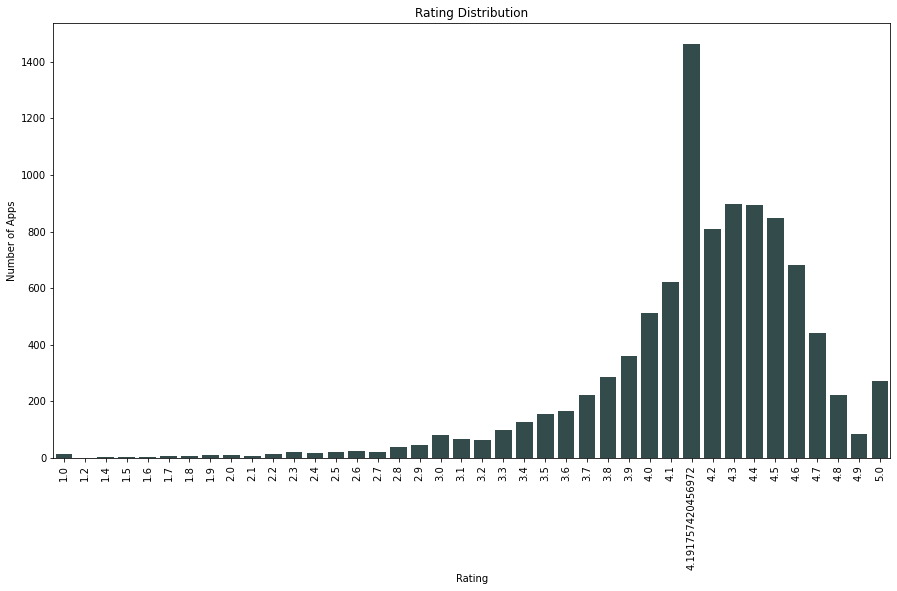

In [61]:
#distribution plot
plt.figure(figsize=(15,8))
sns.countplot(x='Rating',data=PS_rew_data, color="darkslategray")
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

Inference : 
- Large number of apps were rated between 4 to 4.6

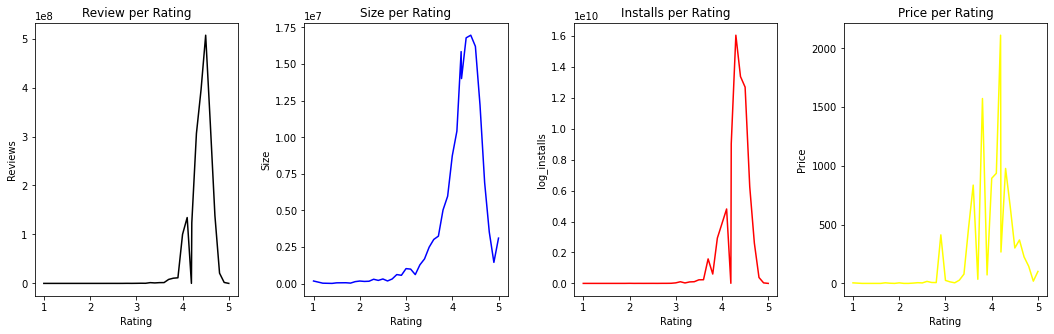

In [63]:
# Now plotting graphs of reviews, size, installs and price per rating
rating_apps = PS_rew_data.groupby('Rating').sum().reset_index()
fig, axes = plt.subplots(1,4,figsize=(15,5))

axes[0].plot(rating_apps['Rating'],rating_apps['Reviews'],'black')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Reviews')
axes[0].set_title('Review per Rating')

axes[1].plot(rating_apps['Rating'],rating_apps['Size'],'blue')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Size')
axes[1].set_title('Size per Rating')

axes[2].plot(rating_apps['Rating'],rating_apps['Installs'],'red')
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('log_installs')
axes[2].set_title('Installs per Rating')

axes[3].plot(rating_apps['Rating'],rating_apps['Price'],'yellow')
axes[3].set_xlabel('Rating')
axes[3].set_ylabel('Price')
axes[3].set_title('Price per Rating')

plt.tight_layout(pad=2)
plt.show()


##Inference:
**- From the above plotting, we can say that most the apps with higher rating range of 4-4.7 are having high amount of reviews, size, and installs.**
**In terms of price, it doesn't reflect a direct relationship with rating, as could see a fluctuation even at the range of high rating**

3. Analysing 'Size'

In [64]:
#analysing size column
PS_rew_data[['Size']]

,Size
0,19000.0
1,14000.0
2,8.7
3,25000.0
4,2.8
...,...
10836,53000.0
10837,3.6
10838,9.5
10839,0.0


##**Question-3: Now checking the distribution of apps in terms of Size, Rating & Type**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


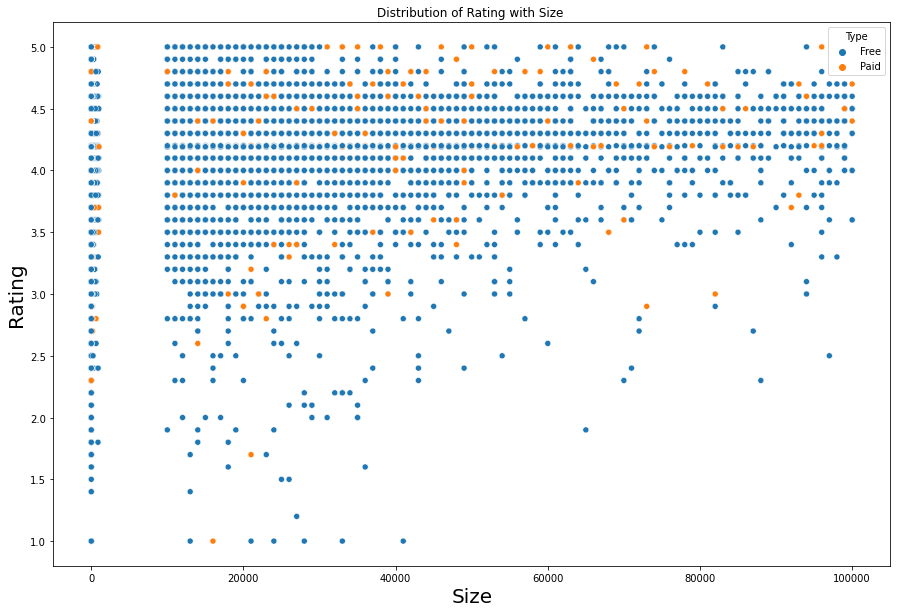

In [67]:
plt.figure(figsize=(15,10))
sns.scatterplot(PS_rew_data['Size'],PS_rew_data['Rating'],hue=PS_rew_data['Type'])
plt.xlabel("Size",fontsize=20)
plt.ylabel("Rating",fontsize=20)
plt.title("Distribution of Rating with Size ")
plt.show()

##Inference - 

**From above scatter plot, we can imply that majority of free apps are small in size and having high rating. While paid apps have quite equal distribution in terms of size and rating.**

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


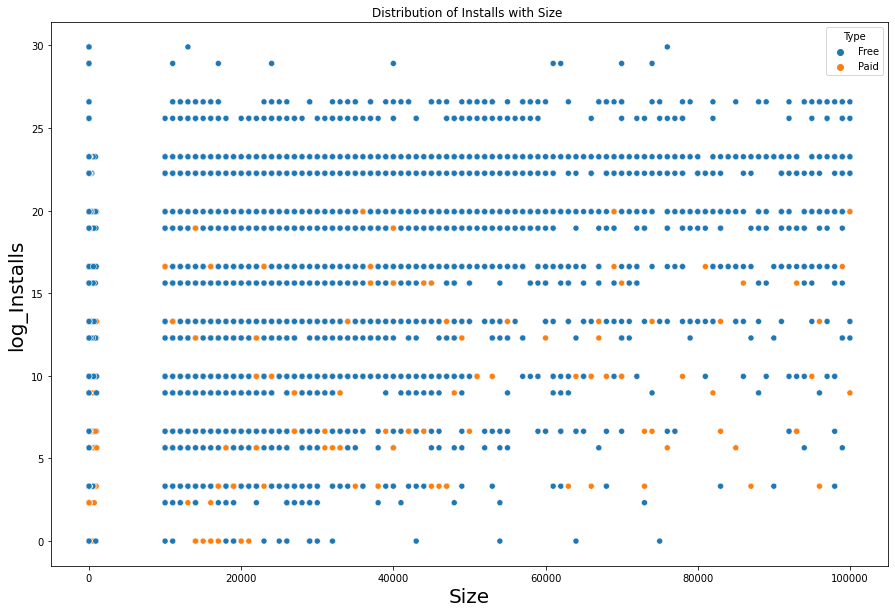

In [72]:
##As we can notice,there is a high variance in the number of installs. 
PS_rew_data['log_installs'] = np.log2(PS_rew_data['Installs'])

plt.figure(figsize=(15,10))
sns.scatterplot(PS_rew_data['Size'],PS_rew_data['log_installs'],hue=PS_rew_data["Type"])
plt.xlabel("Size",fontsize=20)
plt.ylabel("log_Installs",fontsize=20)
plt.title("Distribution of Installs with Size ")
plt.show()

##**Inference**

**- Also, we can say that the bulky apps are less downloaded by user.**

**Size does effect the Rating of the Apps**

4. Analysing 'Installs'

##**Question 4- Lets establish a relation of Install from to Maximum Number of Installs in Playstore**

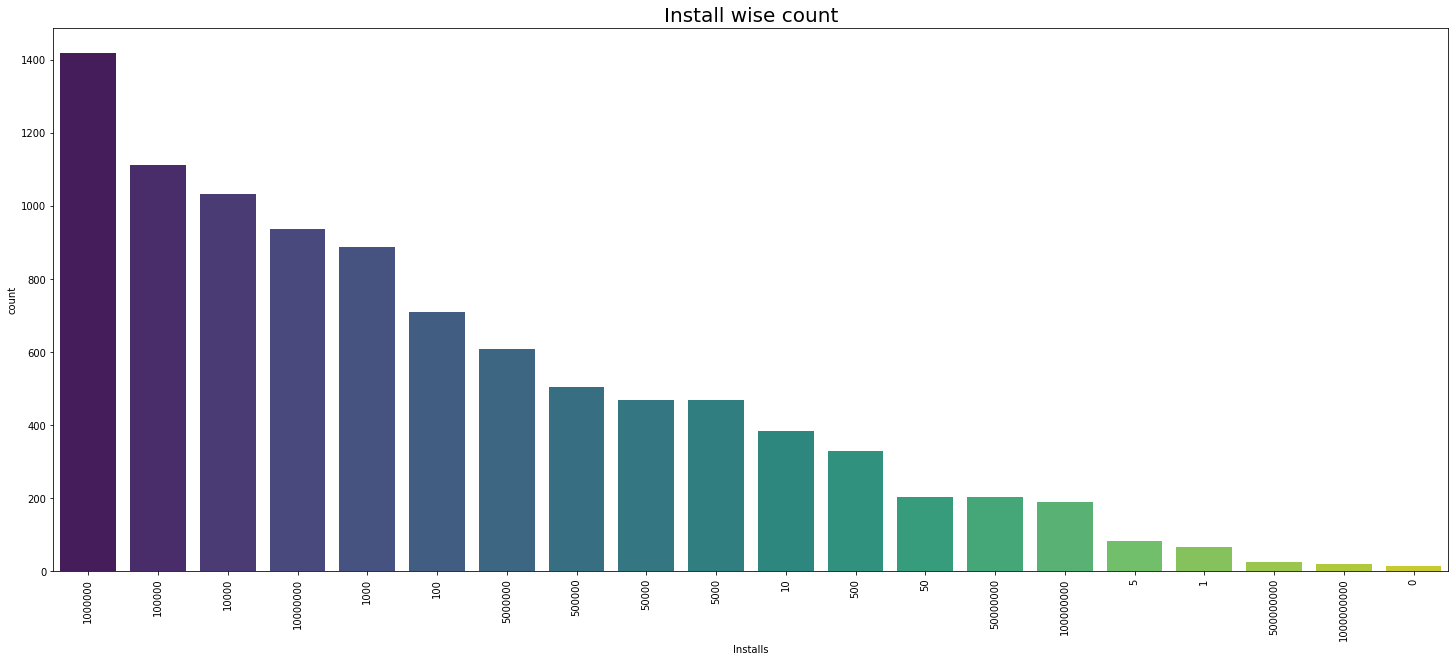

In [78]:
#visualizing Size wise count 
plt.figure(figsize = (25,10))
sns.countplot(x='Installs',data=PS_rew_data,order=PS_rew_data.Installs.value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Install wise count',size = 20 )
plt.show()

**Inference -**

**-10,00,000 is the maximum installion of apps.**

##5. Analysing 'Type'


##**Question-5(a): Checking the proportion of Free and Paid Apps**

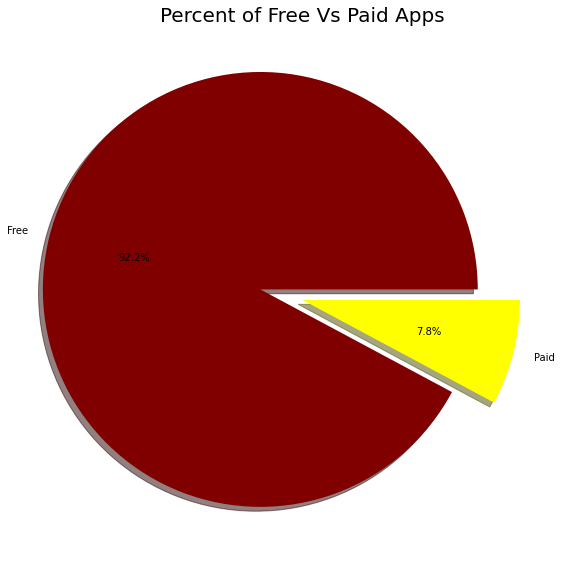

In [83]:
plt.figure(figsize=(10,10))
labels = PS_rew_data['Type'].value_counts(sort = True).index
sizes = PS_rew_data['Type'].value_counts(sort = True)
colors = ["maroon","yellow"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps',size = 20)
plt.show()

**Inference-**

**-From above Pie chart we can clearly see that majority of apps are free**

##**Question-5: (b)Content Rating Ratios from all apps**

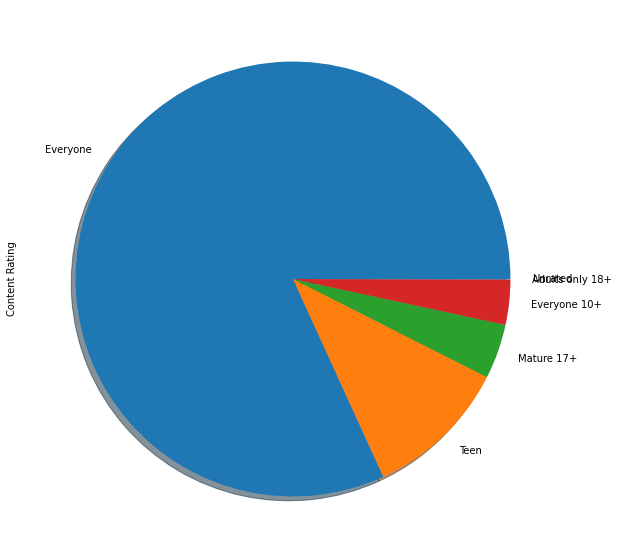

In [88]:
plt.figure(figsize=(10,10))
pd.value_counts(PS_rew_data["Content Rating"]).plot(kind = 'pie', shadow=True)
plt.show()

**Inference-**

**-The Majority Content of Apps in Playstore are everyone thus, installing a user-friendly environment**

##**Question-5: (c)Content Rating in Free and Paid Apps**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


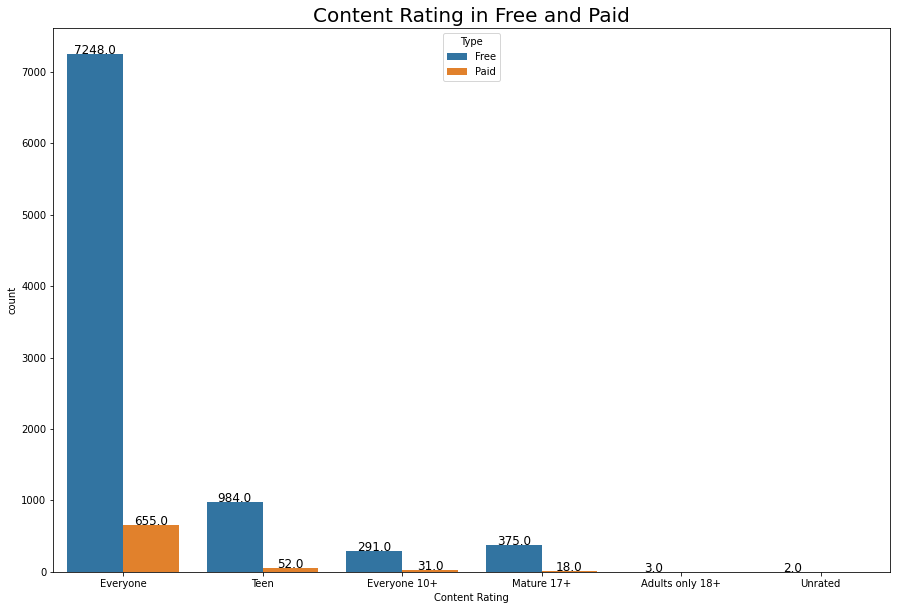

In [90]:
plt.figure(figsize=(15,10))
ax = sns.countplot(PS_rew_data['Content Rating'],hue=PS_rew_data['Type']);
plt.title("Content Rating in Free and Paid",size=20)

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12)
    
plt.show()



##**Question-6: Let us examine the Free and Paid Apps available according to Category**

In [101]:
app_count = PS_rew_data.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})
df_app_count = app_count.pivot('Category','Type','Count').fillna(0).reset_index()

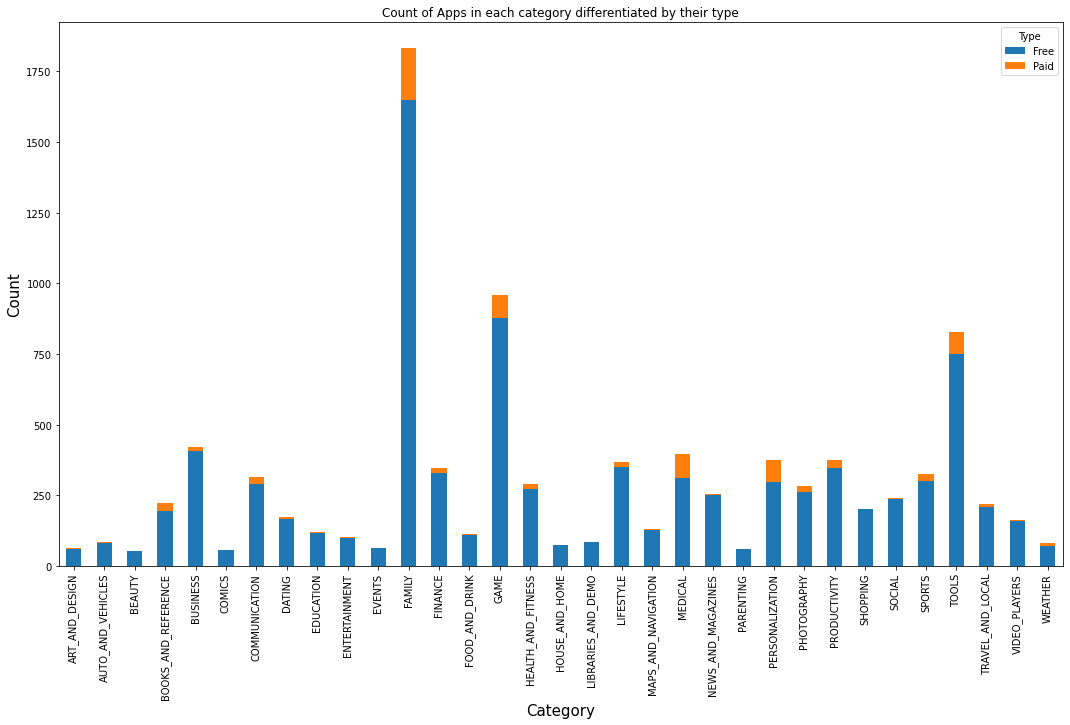

In [102]:
df_app_count.set_index('Category').plot(kind='bar',stacked=True,figsize=(18,10))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of Apps in each category differentiated by their type")
plt.show()

**Inference**

**-The bar plot shows clearly that majority of categories contains free app for download. The most paid apps availbale for download are in Family, Game, Tools and Medical category**

##**Question-6(b): Let us examine the Free and Paid Apps downloads according to Category**

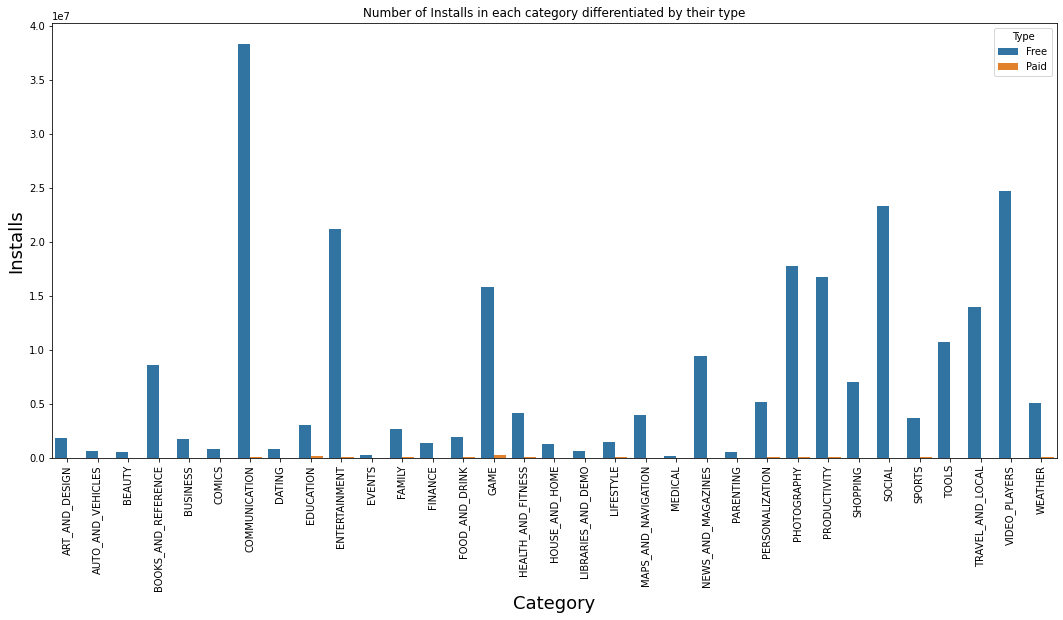

In [105]:
category_type_install=PS_rew_data.groupby(["Category","Type"]).agg({"Installs":"mean"}).reset_index()
most_category_download=pd.DataFrame(category_type_install)

# we are plotting bar plot for above grouped dataframe
plt.figure(figsize=(18,8))
sns.barplot(x="Category",y="Installs",hue="Type",data=most_category_download)
plt.xlabel("Category", fontsize=18)
plt.ylabel("Installs", fontsize=18)
plt.title("Number of Installs in each category differentiated by their type")
plt.xticks(rotation=90)
plt.show();

**Inference-**

**- It is pretty evident from above plot that free apps are installed by user are high when compared to paid apps**

##**Question 7: Which Category has the maximum number of Installs?**

In [92]:
grp = PS_rew_data.groupby('Category')
x = grp['Installs'].agg(np.mean)


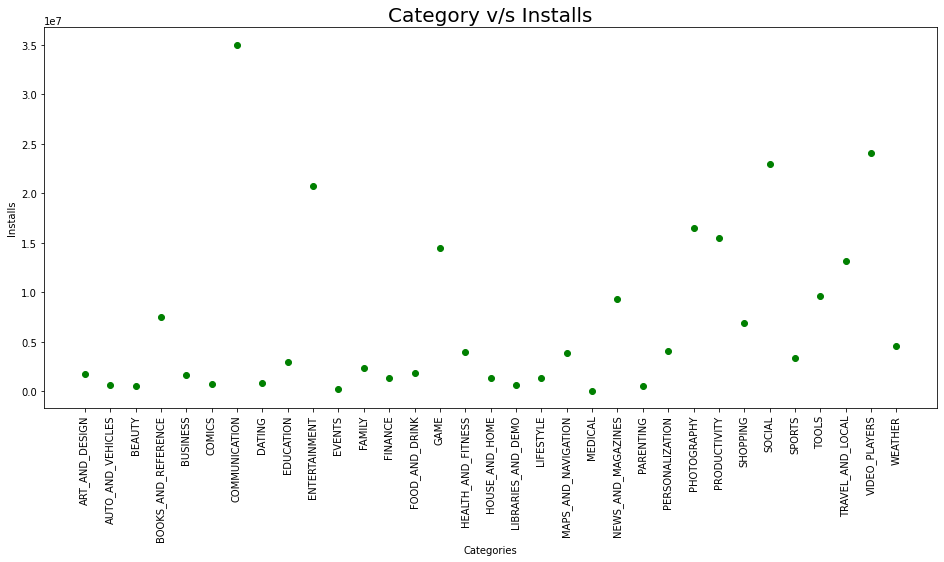

In [96]:
plt.figure(figsize=(16,7))
plt.plot(x, 'ro', color='g')
plt.xticks(rotation=90)
plt.title('Category v/s Installs', fontsize=20)
plt.xlabel('Categories')
plt.ylabel('Installs')
plt.show()

##**Inference-**

**It is clearly visible that the Categories for maximum number of installs are Entertainment, Games, Photography, Social.**

##**Question 8- What are the Categories with Highest ratings?**

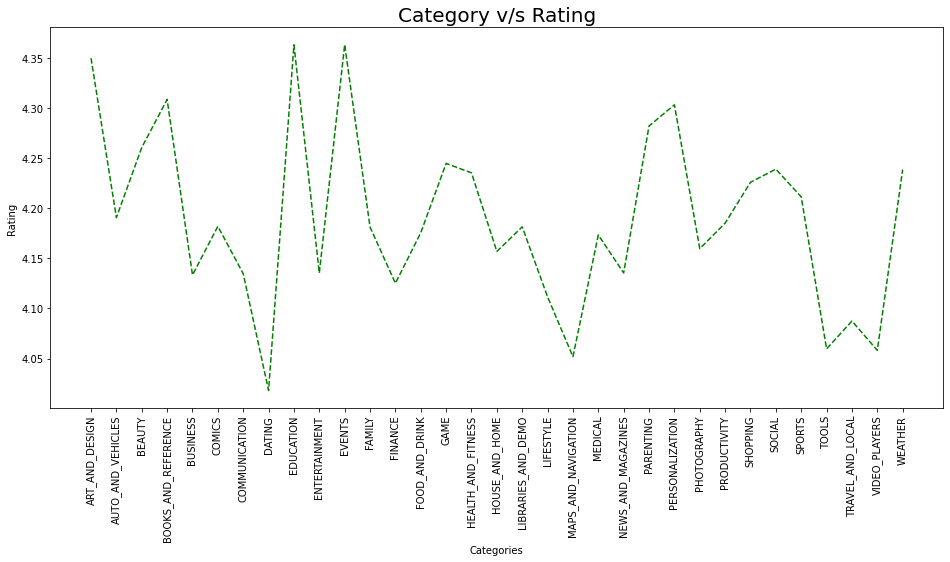

In [97]:
y = grp['Rating'].agg(np.mean)
plt.figure(figsize=(16,7))
plt.plot(y, 'r--', color='g')
plt.xticks(rotation=90)
plt.title('Category v/s Rating', fontsize=20)
plt.xlabel('Categories')
plt.ylabel('Rating')
plt.show()

##**Question 9- What are the Categories with Highest number of Installs?**

Text(0.5, 1.0, 'Category of Apps with highest number of installs')

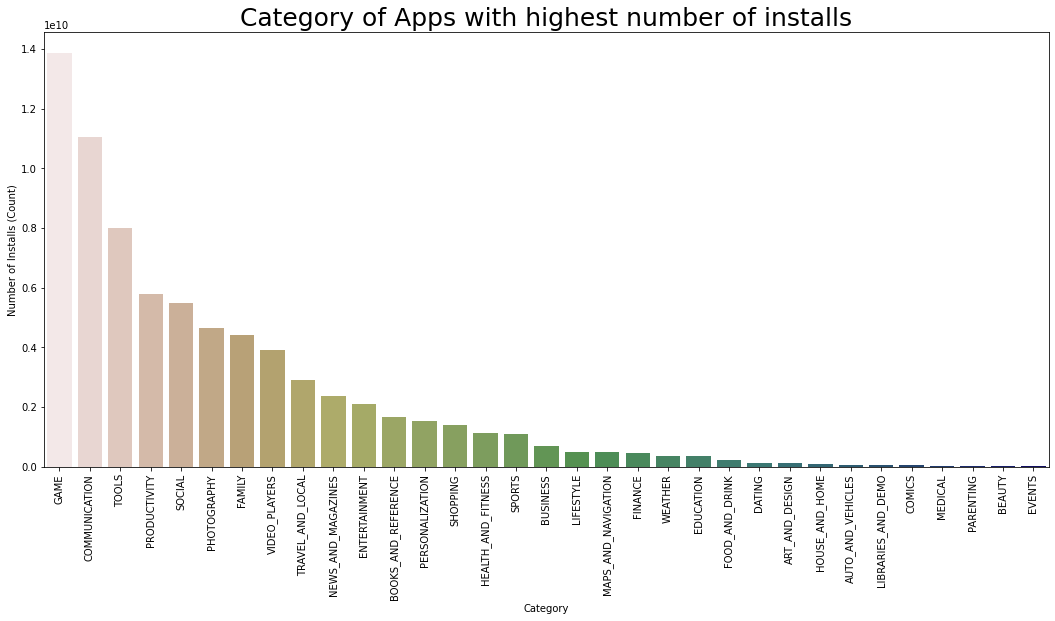

In [100]:
highest_Installs = PS_rew_data.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)
x2sis = []
y2sis = []

for i in range(len(highest_Installs)):
    x2sis.append(highest_Installs.Installs[i])
    y2sis.append(highest_Installs.index[i])
plt.figure(figsize = (18, 8))
plt.xlabel("Category")
plt.ylabel("Number of Installs (Count)")
plt.xticks(rotation = 90)
ax = sns.barplot(x = y2sis, y = x2sis, palette= "gist_earth_r")
ax.set_title("Category of Apps with highest number of installs", fontsize = 25)

**Inference-**

**- Top Category of installs is for Games, Communication, Tools.**

##**Correlation- The corr() method calculates the relationship between each column in your data set.**

In [108]:
 PS_rew_data.corr()

,Rating,Reviews,Size,Installs,Price,log_installs
Rating,1.000000,0.054336,0.036374,0.039244,-0.019417,0.057841
Reviews,0.054336,1.000000,0.043886,0.625165,-0.007598,0.207449
Size,0.036374,0.043886,1.000000,0.002164,-0.015972,0.172975
Installs,0.039244,0.625165,0.002164,1.000000,-0.009405,0.263343
Price,-0.019417,-0.007598,-0.015972,-0.009405,1.000000,-0.041396
log_installs,0.057841,0.207449,0.172975,0.263343,-0.041396,1.000000


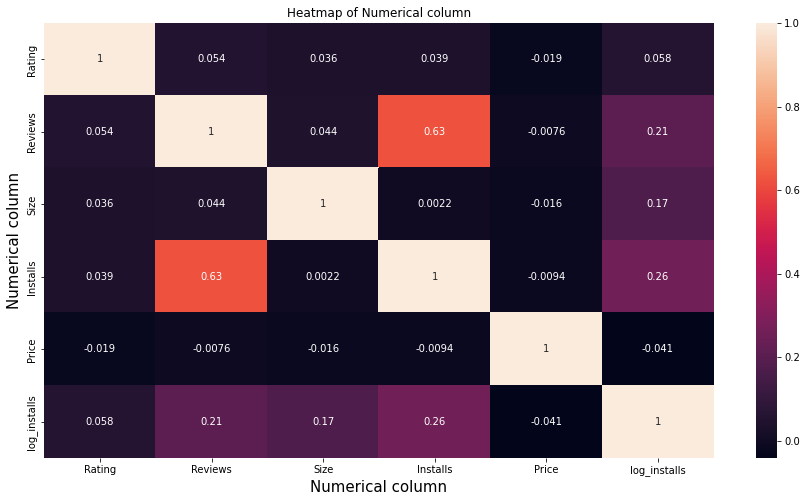

In [113]:
# heatmap syntax(always ploted on correlation)
plt.figure(figsize=(15,8))
plt.title("Heatmap of Numerical column")
sns.heatmap(PS_rew_data.corr(),annot=True,robust=True)
plt.xlabel("Numerical column", fontsize=15)
plt.ylabel("Numerical column", fontsize=15)
plt.show();

**Inference :**

**- The correlation between install and reviews is high.**

In [114]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Creating word cloud with category of app

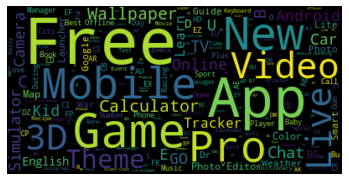

In [115]:
#subsetting df
df_word_cloud = PS_rew_data[['Category','App']]
text = " ".join(word for word in df_word_cloud.App)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#word cloud for each category
def func_select_Category(category_name):
  df_word_cloud = playstore_data[['Category','App']]
  df_word_cloud = df_word_cloud[df_word_cloud['Category']==category_name]
  text = " ".join(word for word in df_word_cloud.App)
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

Creating Word cloud for the category 'Communication'

In [ ]:
func_select_Category('COMMUNICATION')

In [ ]:
sns.lmplot(x='Sentiment_Polarity', y='Sentiment_Subjectivity', data= user_reviews_data, fit_reg=True)

Inference: 
- Slightly positive correlation.

**Top 10 apps to find positive reviews**

In [ ]:
sentiment_app = user_reviews_data[['App','Sentiment']].dropna()
sentiment_app = sentiment_app.value_counts().to_frame().reset_index()
positive = sentiment_app[sentiment_app['Sentiment']=='Positive'].sort_values(by=0,ascending=False)[:10]

In [ ]:
sns.barplot(y="App", x=0, data=positive,palette='YlGnBu')
plt.ylabel('App')
plt.xlabel('Number of Positive reviews')
plt.title('Top 10 apps having most number of positive reviews')


In [ ]:
#word cloud for user rating review
def func_select_Category(category_name):
  df_word_cloud = user_reviews_data[['Sentiment','Translated_Review']].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['Sentiment']==category_name]
  text = " ".join(word for word in df_word_cloud.Translated_Review)
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


Word cloud for positive reviews

In [ ]:
func_select_Category('Positive')